# &emsp;Bitcoin Price Prediction Project
###### &emsp;&ensp;&nbsp;&ensp;&emsp; by &ensp; Ramon Rosiles &ensp; and &ensp; Jesus Ruelas-Perez 
###### 


## Step 0: Import Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from ipywidgets import interactive
from matplotlib import pyplot as plt
import os

## Step 1: Load Data

In [2]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv("bitcoin_2010-07-17_2023-04-27.csv") #
df.shape

(4667, 7)

In [3]:
# Print the first 5 rows of my CSV file
print(df.head())

          Date      Open      High       Low     Close        Volume  \
0  Apr-26-2023  28297.81  29965.49  27425.67  28376.59  5.629708e+10   
1  Apr-25-2023  27521.63  28355.86  27228.11  28326.83  3.973265e+10   
2  Apr-24-2023  27589.73  27967.05  27121.80  27529.20  3.589580e+10   
3  Apr-23-2023  27818.83  27818.83  27400.17  27588.57  3.021019e+10   
4  Apr-22-2023  27262.87  27853.24  27177.26  27820.65  4.786413e+10   

     Market Cap  
0  5.580304e+11  
1  5.327477e+11  
2  5.319354e+11  
3  5.334906e+11  
4  5.305524e+11  


## Step 2: Clean the Data

In [4]:
# Remove rows with missing values
df = df.dropna()

# Convert the "date" column to a datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Drop any duplicate rows
df = df.drop_duplicates()

# Remove any leading or trailing white spaces in the column names
df.columns = df.columns.str.strip()

# Sort the DataFrame by the "date" column in Ascending Order
df = df.sort_values(by="Date", ascending=True)

# Define the start and end dates to remove data
start_date = "2010-07-17"
end_date = "2013-12-26"

# Remove rows that have a date between the start and end dates
# Entries all contained a value of 0 in the Volume Column
df = df[(df["Date"] < start_date) | (df["Date"] > end_date)]

# Reset the index of the DataFrame
df = df.reset_index(drop=True)

# Save the cleaned data to a new CSV file
df.to_csv("cleaned_coincodex_bitcoin_daily.csv", index=False)

print(df.head())

        Date    Open    High     Low   Close        Volume    Market Cap
0 2013-12-27  763.28  777.51  713.60  735.07  5.957482e+07  5.107930e+10
1 2013-12-28  737.98  747.06  705.35  727.83  3.716228e+07  9.052405e+09
2 2013-12-29  728.05  748.61  714.44  745.05  2.522472e+07  8.855014e+09
3 2013-12-30  741.35  766.60  740.24  756.13  2.276158e+07  9.208370e+09
4 2013-12-31  760.32  760.58  738.17  754.01  2.036396e+07  9.160241e+09


## Step 3: Analyze the Data

In [5]:
# Load the cleaned CSV file into a pandas DataFrame
df = pd.read_csv("cleaned_coincodex_bitcoin_daily.csv")

# Convert the "date" column to a datetime format
df["Date"] = pd.to_datetime(df["Date"])


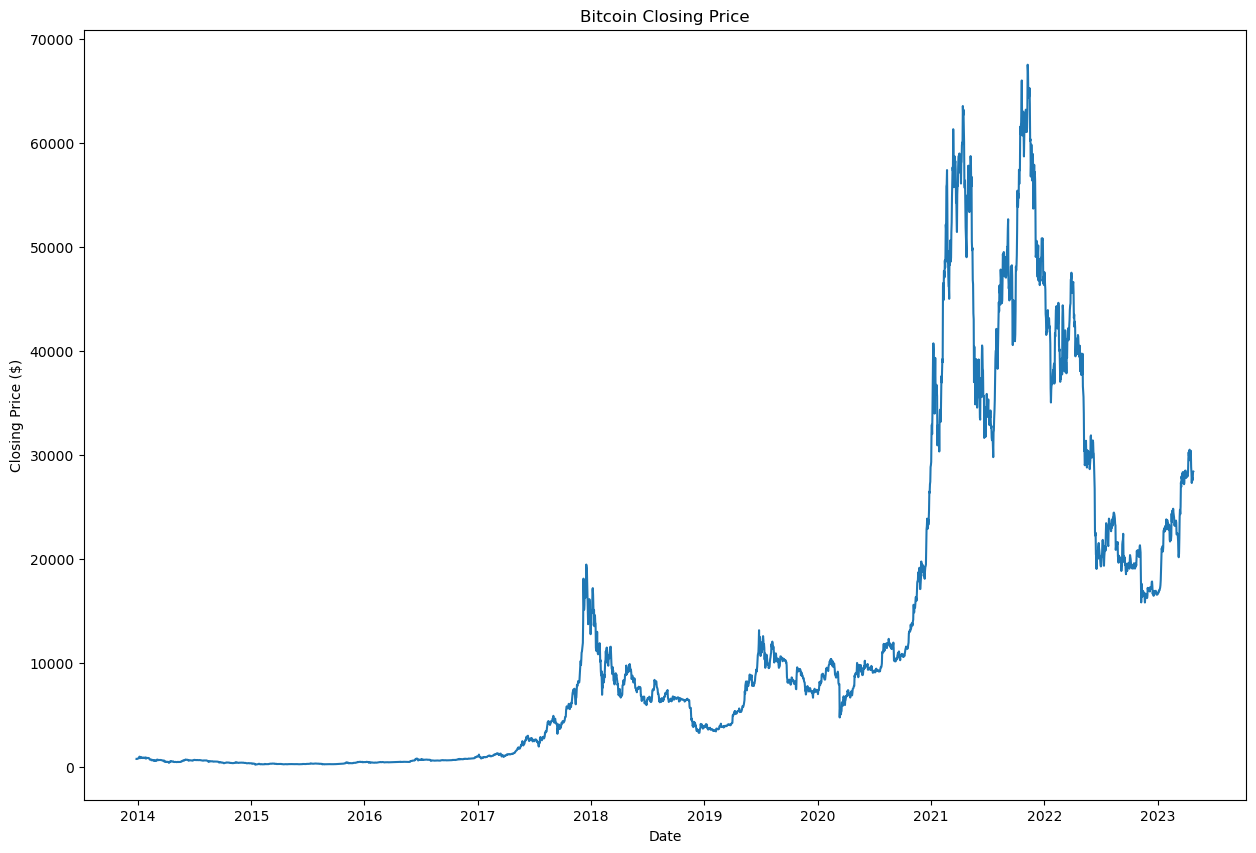

In [6]:
# Plot the closing price of Bitcoin over time
plt.figure(figsize=(15,10))
plt.title("Bitcoin Closing Price")
plt.xlabel("Date")
plt.ylabel("Closing Price ($)")
plt.plot(df["Date"], df["Close"])
#plt.show()

Text(0, 0.5, 'Volume')

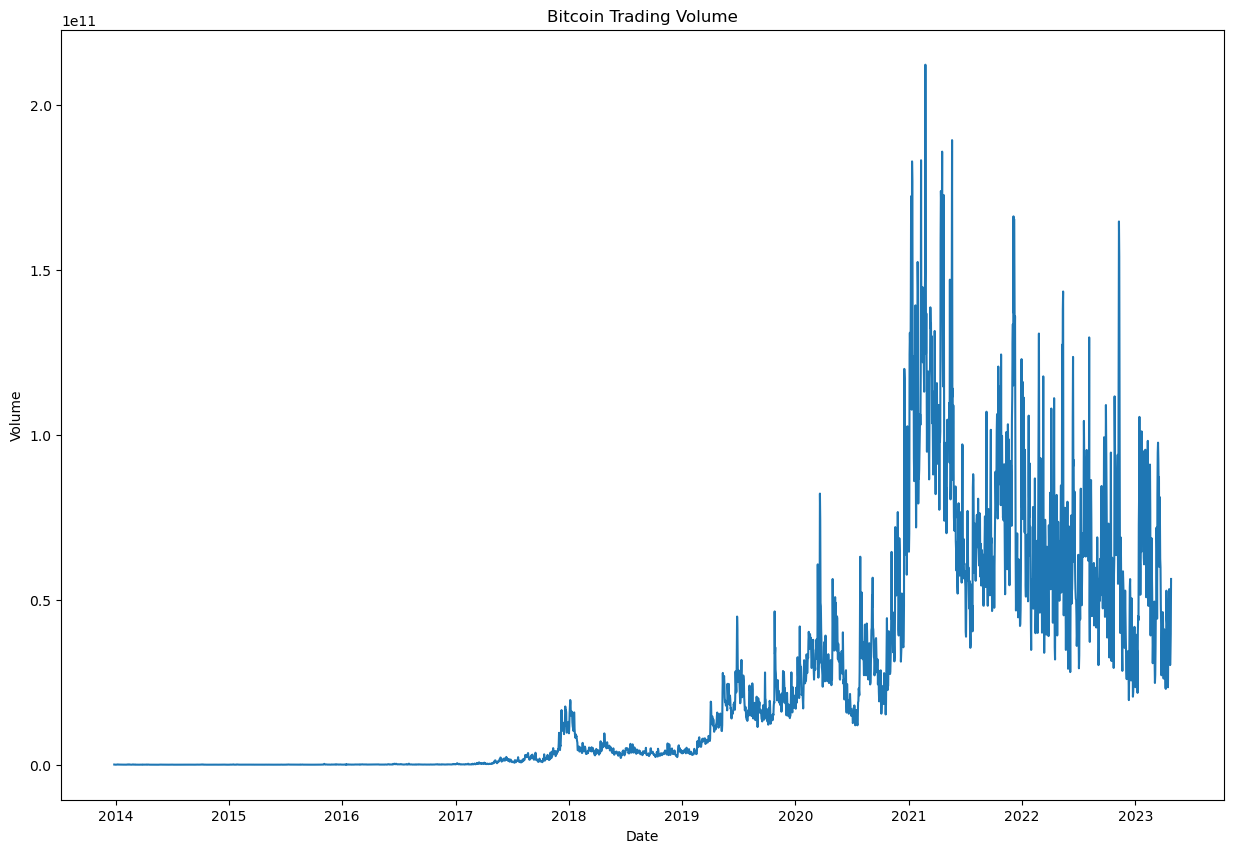

In [7]:
plt.figure(figsize=(15,10))
plt.plot(df["Date"], df["Volume"])
plt.title("Bitcoin Trading Volume")
plt.xlabel("Date")
plt.ylabel("Volume")

Text(0, 0.5, 'Volume')

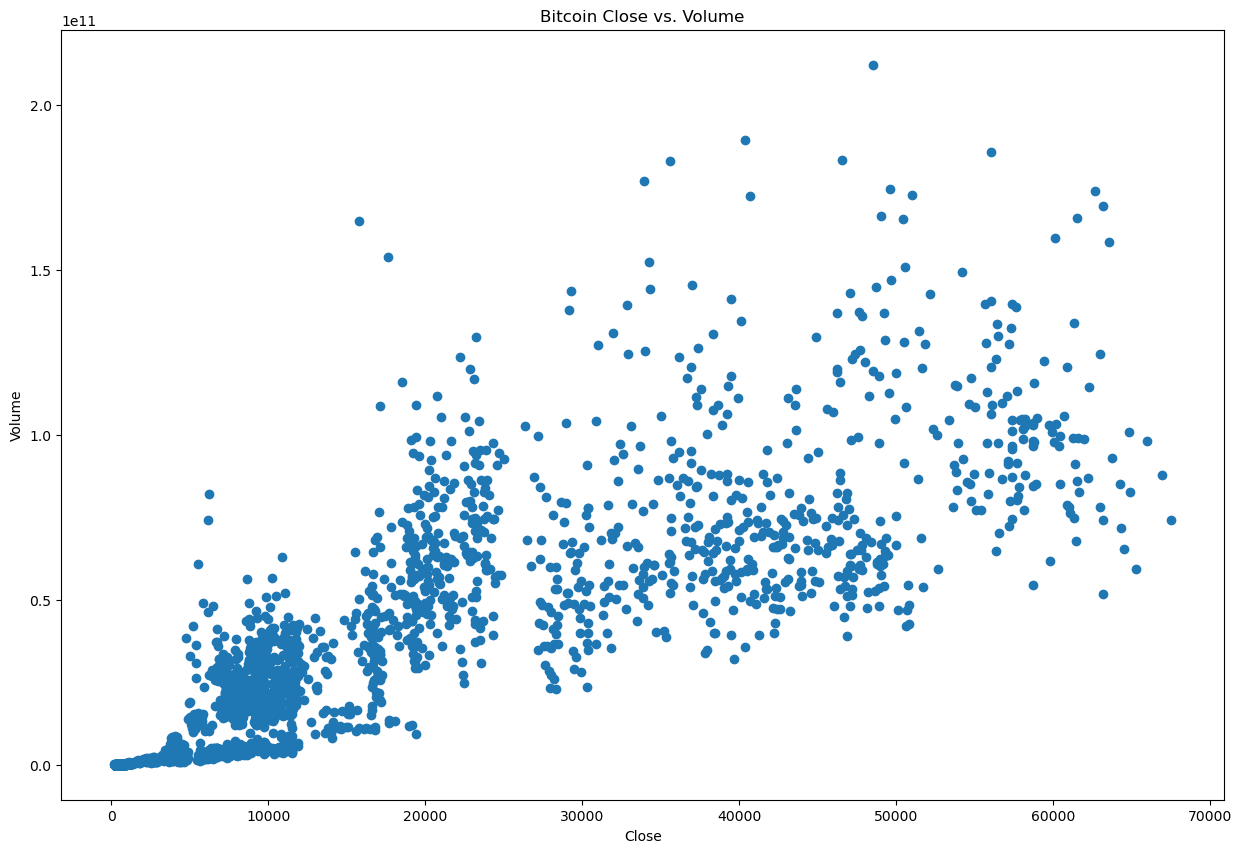

In [8]:
plt.figure(figsize=(15,10))
plt.scatter(df["Close"], df["Volume"])
plt.title("Bitcoin Close vs. Volume")
plt.xlabel("Close")
plt.ylabel("Volume")

In [9]:
# Load the "bitcoin_events.csv"
events_df = pd.read_csv("bitcoin_events.csv")
events_df["date"] = pd.to_datetime(events_df["date"])
events_df

,date,event,sentiment
0,2014-02-28,MT. Gox the largest Bitcoin exchange at the ti...,negative
1,2014-06-12,Islamic State (IS) declares a caliphate in Ira...,conflict
2,2014-06-19,First major merchant to accept Bitcoin: DISH N...,positive
3,2014-07-06,Bolivia bans all cryptocurrency transactions,negative
4,2014-07-08,Israel launches Operation Protective Edge agai...,conflict
5,2014-07-25,Ecuador bans all cryptocurrency transactions,negative
6,2015-01-07,Coinbase raises $75 million in funding from in...,positive
7,2015-03-26,Saudi Arabia leads a coalition of Arab states ...,conflict
8,2016-07-09,Second Bitcoin halving event occurs,positive
9,2016-07-15,Turkey experiences an attempted coup d'etat,conflict


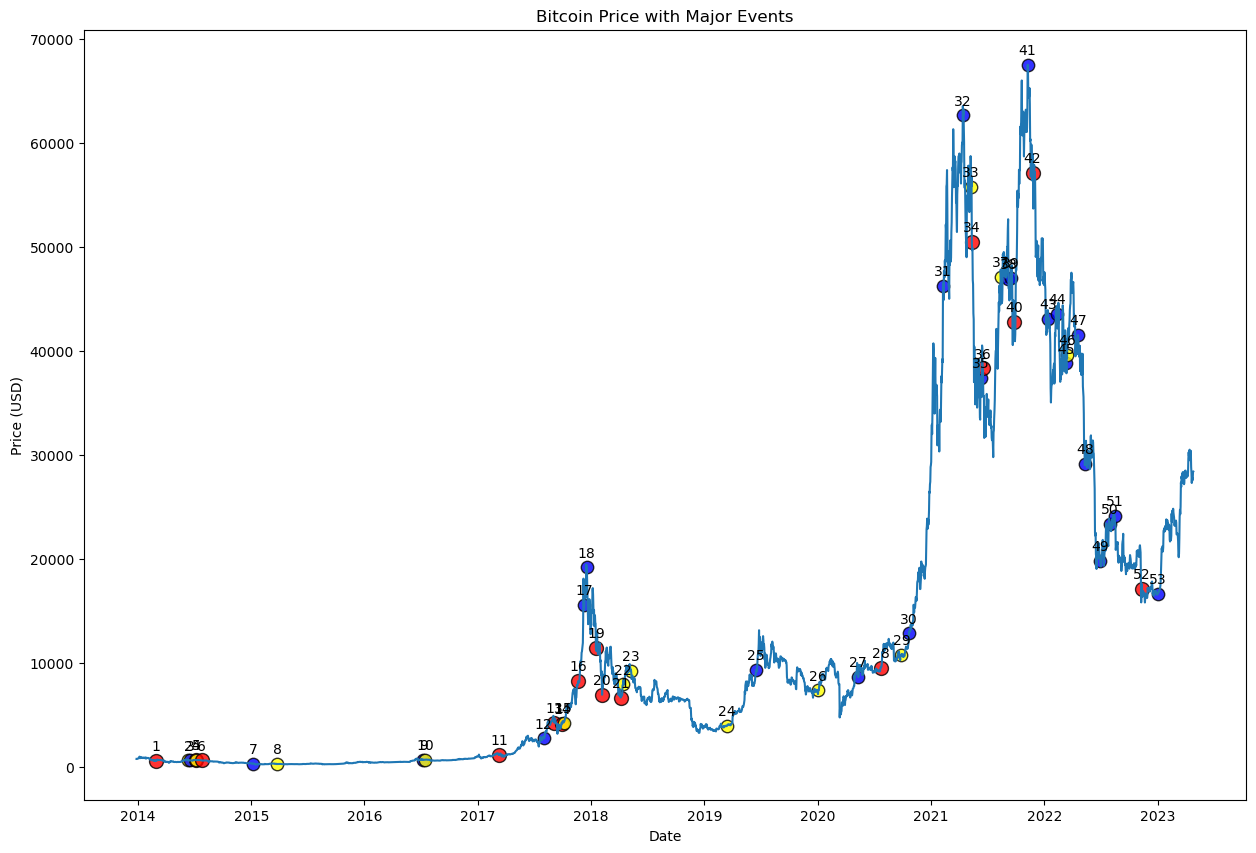

In [10]:
# set figure size
fig = plt.figure(figsize=(15, 10))

# plot date vs close price as a line
plt.plot(df['Date'], df['Close'], label='Close $')

# create a scatter plot for events
event_colors = {'positive': 'blue', 'negative': 'red', 'conflict': 'yellow'}
event_sizes = {'positive': 80, 'negative': 100, 'conflict': 80}
for i, event in enumerate(events_df.iterrows()):
    event = event[1]
    color = event_colors[event['sentiment']]
    size = event_sizes[event['sentiment']]
    event_date = event['date']
    event_close = df[df['Date'] == event_date]['Close'].values[0]
    label = f"{i+1}. {event['event']}"
    plt.scatter(event_date, event_close, s=size, color=color,
                alpha=0.8, edgecolors='black', linewidths=1, label=label)
    # Add the enumerated event number above the point
    plt.text(event_date, event_close + 1000, str(i+1), ha='center', fontsize=10)

# set plot labels and title
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price with Major Events')
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# show the plot
plt.show()

## Step 4: Enrich the Dataset

In [11]:
# FED Fund Rate
FEDdf = pd.read_csv("FED_Rate.csv")

# Gold prices
GLDdf = pd.read_csv("Gold Dataset.csv")

# BTC Sentiment Analysis
SENTdf = pd.read_csv("btc_df.csv")

In [12]:
FEDdf.head(2400)

,Date,FEDFUNDS
0,1/1/2021,0.09
1,1/2/2021,0.09
2,1/3/2021,0.09
3,1/4/2021,0.09
4,1/5/2021,0.09
...,...,...
784,2/24/2023,4.57
785,2/25/2023,4.57
786,2/26/2023,4.57
787,2/27/2023,4.57


In [13]:
# Rename 'date'column to 'Date' for SENTdf
FEDdf = FEDdf.rename(columns={'FEDFUNDS': 'FED_Rate'})
GLDdf = GLDdf.rename(columns={'Close/Last': 'Gold_Price'})
SENTdf = SENTdf.rename(columns={'date': 'Date'})
SENTdf = SENTdf.rename(columns={'normalized': 'Sentiment_Score'})

# Remove rows with missing values
FEDdf = FEDdf.dropna()
GLDdf = GLDdf.dropna()
SENTdf = SENTdf.dropna()

# Convert the "date" column to a datetime format
df["Date"] = pd.to_datetime(df["Date"])
FEDdf["Date"] = pd.to_datetime(FEDdf["Date"])
GLDdf["Date"] = pd.to_datetime(GLDdf["Date"])
SENTdf["Date"] = pd.to_datetime(SENTdf["Date"])

# Drop any duplicate rows
FEDdf = FEDdf.drop_duplicates()
GLDdf = GLDdf.drop_duplicates()
SENTdf = SENTdf.drop_duplicates()

# Remove any leading or trailing white spaces in the column names
FEDdf.columns = FEDdf.columns.str.strip()
GLDdf.columns = GLDdf.columns.str.strip()
SENTdf.columns = SENTdf.columns.str.strip()

# Sort the DataFrame by the "date" column in Ascending Order
FEDdf = FEDdf.sort_values(by="Date", ascending=True)
GLDdf = GLDdf.sort_values(by="Date", ascending=True)
SENTdf = SENTdf.sort_values(by="Date", ascending=True)

In [14]:
FEDdf

,Date,FED_Rate
0,2021-01-01,0.09
1,2021-01-02,0.09
2,2021-01-03,0.09
3,2021-01-04,0.09
4,2021-01-05,0.09
...,...,...
784,2023-02-24,4.57
785,2023-02-25,4.57
786,2023-02-26,4.57
787,2023-02-27,4.57


In [15]:
SENTdf.head()

,Unnamed: 0,Date,count,Sentiment_Score
0,331,2021-01-02,1,0.000
1,330,2021-01-04,1,0.527
2,329,2021-01-08,1,0.382
3,328,2021-06-18,1,-0.250
4,327,2021-07-27,1,0.000


In [16]:
# Merge ALL the Datasets
Newdf = pd.merge(df, FEDdf, on=['Date']).merge(GLDdf[['Date', 'Gold_Price']], 
        on=['Date'], how='inner').merge(SENTdf[['Date', 'Sentiment_Score']], on=['Date'], how='inner')

In [17]:
Newdf.head(300)

,Date,Open,High,Low,Close,Volume,Market Cap,FED_Rate,Gold_Price,Sentiment_Score
0,2021-01-04,32949.399464,33553.450548,29066.665438,31973.832154,1.309183e+11,5.918035e+11,0.09,1946.6,0.5270
1,2021-01-08,39437.440337,41849.906402,36711.862225,40703.290535,1.722954e+11,7.394998e+11,0.09,1835.4,0.3820
2,2021-06-18,38026.050000,38128.360000,35220.877378,35577.470000,6.157587e+10,6.931008e+11,0.08,1769.0,-0.2500
3,2021-07-27,37292.760000,39204.300000,36462.030000,39184.610000,8.805681e+10,7.068869e+11,0.10,1804.0,0.0000
4,2021-09-17,47762.124500,48128.164286,46871.891900,47197.551800,5.334134e+10,8.951753e+11,0.08,1751.4,0.0259
...,...,...,...,...,...,...,...,...,...,...
234,2022-08-26,21563.193110,21812.788896,20122.778513,20215.514855,5.450458e+10,4.049419e+11,2.33,1749.8,0.1138
235,2022-08-29,19539.580700,20360.700500,19539.580700,20280.871176,5.001186e+10,3.822241e+11,2.33,1749.7,0.1060
236,2022-08-30,20295.057469,20558.011500,19595.580500,19768.065300,5.913007e+10,3.854115e+11,2.33,1736.3,0.1208
237,2022-08-31,19794.257300,20438.013302,19794.257300,20046.947100,6.891024e+10,3.866522e+11,2.33,1726.2,0.0317


C:\Users\jesus\AppData\Local\Temp\ipykernel_21556\1452479009.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Newdf.corr(), annot=True, cmap="coolwarm") #cmap="YlGnBu" looks nice


<Axes: >

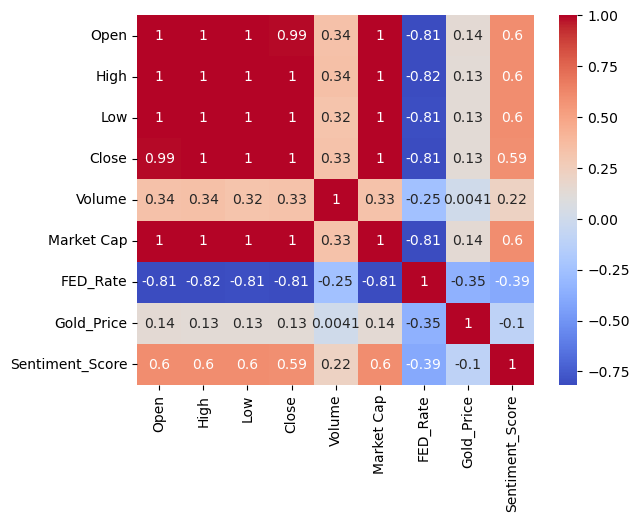

In [18]:
#Newdf['Date'] = Newdf['Date'].map(lambda x:x.strftime("%d.%m.%Y, %H:%M:%S"))
sns.heatmap(Newdf.corr(), annot=True, cmap="coolwarm") #cmap="YlGnBu" looks nice

So, for the Close feature from the CoinCodex dataset, we see that with Fed_rate it has a high negative correlation. 
The Gold Price seems to have very little positive correlation with Bitcoin.
And lastly, the Sentiment Score had a moderate positive correlation with Bitcoin’s Closing Price.

These features that we gathered do seem to be good predictors for Bitcoin’s Price, proceeded to create data visualizations comparing bitcoin closing price against the enriched/new features: FED_Rate, Gold_Price, and Sentiment_Score.

## Step 5: Create Model

In [19]:
X = Newdf[['Open', 'High', 'Low', 'Volume', 'FED_Rate', 'Gold_Price', 'Sentiment_Score']]
y = Newdf['Close']

import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

X_train.shape
X_test.shape

(48, 7)

In [20]:
# Standardization: Scale the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)

[[ 0.16959223  0.11258938  0.05050153 ... -0.38777557  1.67162953
  -0.90520096]
 [-0.01018604 -0.0688621  -0.03807526 ... -0.38777557  1.1568304
  -0.57229013]
 [-1.29404026 -1.33060703 -1.32617291 ...  1.36394011 -1.30574296
   0.24728041]
 ...
 [ 0.15466536  0.08383226  0.00568373 ... -0.5564593   2.4078628
   0.07658949]
 [ 1.51313784  1.45087585  1.53306364 ... -0.71216736  0.60818147
   0.71022129]
 [-0.79950718 -0.83896282 -0.79505464 ...  0.18315398  0.38956814
  -1.21693425]]


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
regression = LinearRegression()

regression.fit(X_train, y_train)

print(regression.coef_)
print(regression.intercept_)

[-9991.17740166 12408.99100961 10861.7709512     81.32275158
  -145.17890343   -26.62181358   -48.24568919]
39694.003285758976


## Step 6: Predictions

In [22]:
predicted = regression.predict(X_test)
predicted.shape

(48,)

In [23]:
dframe = pd.DataFrame(y_test, predicted)

In [24]:
dfr = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': predicted})
print(dfr)

     Actual Price  Predicted Price
178  31193.069200     29667.984581
153  38503.909590     38670.687011
106  37287.486343     38246.718773
111  43938.476843     44150.445300
125  42376.744218     42797.674484
226  23889.746060     23673.901132
122  40958.225160     40780.352205
215  23311.592835     22890.979540
45   63715.769776     64252.335044
194  19816.746360     18986.028918
118  38770.045913     39017.578407
176  29717.558046     29556.306311
218  22635.520004     22664.132959
101  44602.531500     44419.333338
173  31852.834383     31788.907881
154  37732.299752     37711.949629
180  30111.706750     30257.656272
108  39219.476757     39361.903996
184  22490.590727     20999.436325
8    44844.228000     44420.183492
55   57030.125653     57368.519467
90   38472.006236     37547.840430
89   37784.722900     37150.322572
5    42966.010100     43286.400241
22   57357.606700     56011.522848
37   62941.481991     61880.501320
156  36568.759600     36371.596955
12   41543.639900   

In [25]:
regression.score(X_train, y_train)

0.9981161417337265

In [26]:
regression.score(X_test, y_test)

0.9969564007141793

Text(0, 0.5, 'Predicted Price')

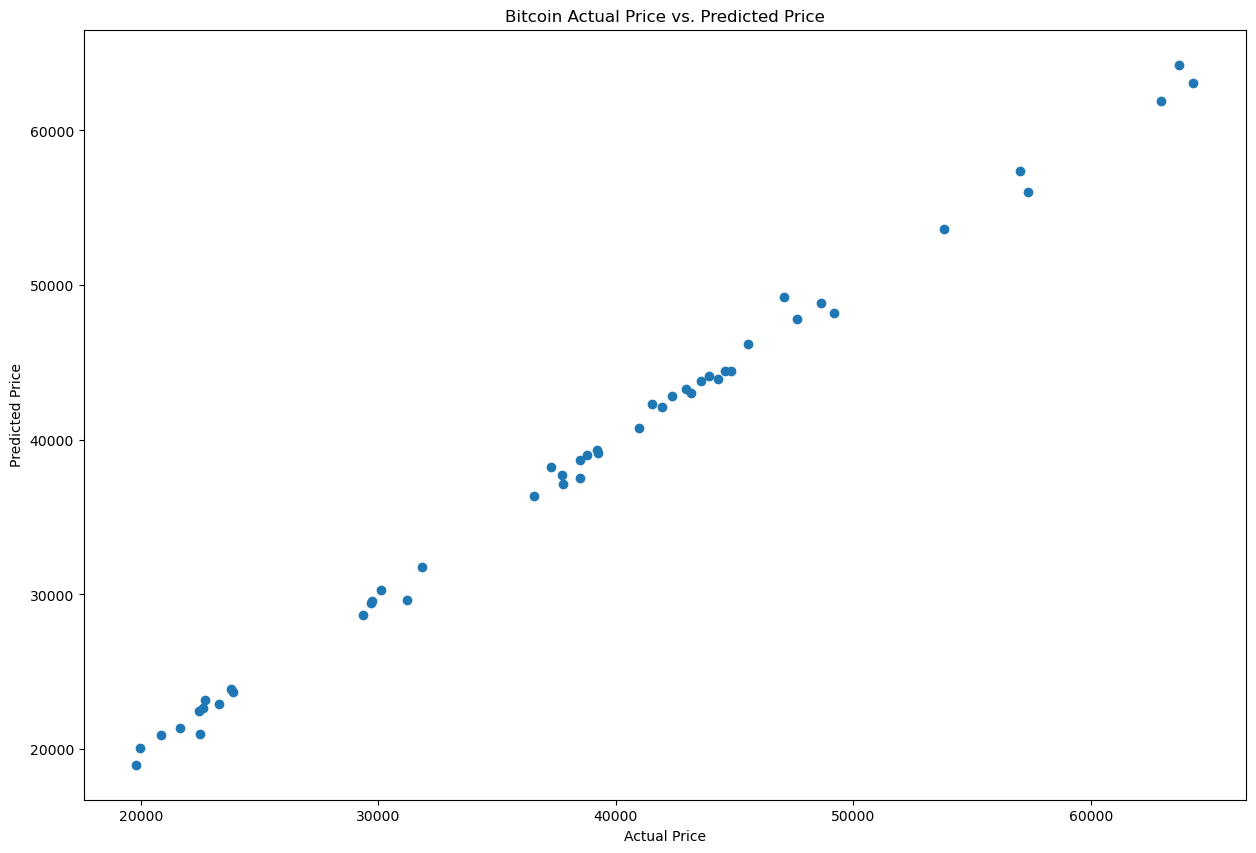

In [27]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, predicted)
plt.title("Bitcoin Actual Price vs. Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

## Bitcoin Closing Price vs Enriched Features

In [28]:
from sklearn.preprocessing import scale
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_coincodex_bitcoin_daily.csv")
df['Date'] = pd.to_datetime(df['Date']) # Make sure the date is formatted well


## Scale Closing Price Data in dataframe
closing_scaled = scale(df['Close'])
scaled_df = df.copy()
scaled_df['Close'] = closing_scaled

### FEDFUNDS Dataset

In [29]:
fed_df = pd.read_csv("FEDFUNDS.csv")
fed_df['DATE'] = pd.to_datetime(fed_df['DATE']) # Make sure the date is formatted well

start_date = "2013-12-26"
# Remove rows that have a date between the start and end dates
fed_df = fed_df[(fed_df["DATE"] > start_date)]


## FEDFUNDS Scale Data
fed_scale = scale(fed_df['FEDFUNDS'])
scaled_fr = fed_df
scaled_fr['FEDFUNDS'] = fed_scale

In [30]:
sns.set(rc={'figure.figsize':(10,5)})

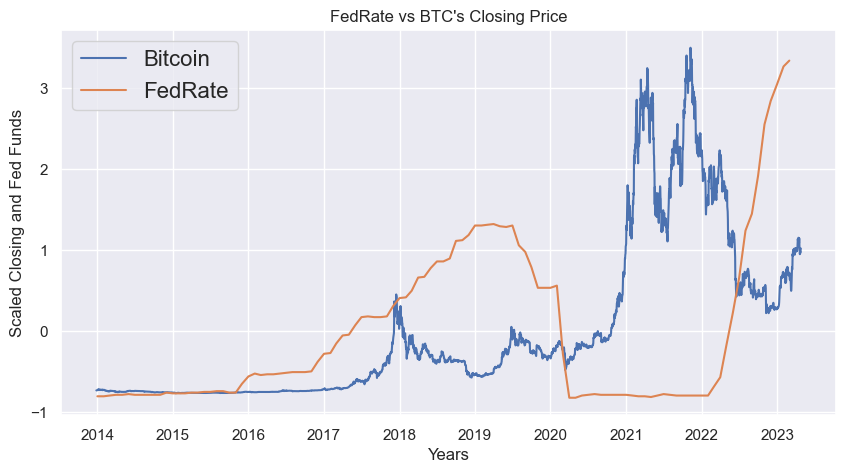

In [31]:
plt.figure(figsize=(10,5))
plt.plot(scaled_df.Date, scaled_df.Close, label='Bitcoin')
plt.plot(scaled_fr['DATE'], scaled_fr['FEDFUNDS'], label='FedRate')
plt.title("FedRate vs BTC's Closing Price")
plt.xlabel("Years")
plt.ylabel("Scaled Closing and Fed Funds")
plt.legend(loc="upper left", fontsize=16)
plt.show()

## Observation:
Bitcoin and Fed Rate share opposite trends. Bitcoin tends to increase as Fed Rate decreases
Near 2019: Fed Rate is increasing and Bitcoin’s Price has a small decrease. And again at 2022.
And at 2020-2022: Fed rate is very low, and Bitcoin began to rise very rapidly.

## Interpretation:
When the Fed Rate is falling or low, there is a great chance of Bitcoin’s increasing. When Fed Rate is rising or high, Bitcoin will mostly like drop in value.

## GOLD Dataset

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

start_date = "2013-12-26"
# Remove rows that are before 2013
gold_df = GLDdf[(GLDdf["Date"] > start_date)]
gold_df

,Date,Gold_Price,Volume,Open,High,Low
2368,2013-12-27,1214.0,73947.0,1210.9,1218.9,1208.5
2367,2013-12-30,1203.8,73220.0,1213.8,1215.8,1193.3
2366,2013-12-31,1202.3,117106.0,1197.4,1214.0,1181.4
2364,2014-01-02,1225.2,129699.0,1226.5,1230.8,1202.5
2363,2014-01-03,1225.2,106585.0,1222.3,1239.6,1221.3
...,...,...,...,...,...,...
4,2023-04-24,1999.8,136854.0,1992.0,2001.5,1984.4
3,2023-04-25,2004.5,214107.0,1999.4,2014.5,1986.2
2,2023-04-26,1996.0,231110.0,2007.7,2020.2,1993.7
1,2023-04-27,1999.0,198056.0,1999.8,2013.3,1982.0


In [33]:
gold_scale = scale(gold_df['Gold_Price'])
scaled_gold = gold_df.copy()
scaled_gold['Gold_Price'] = gold_scale

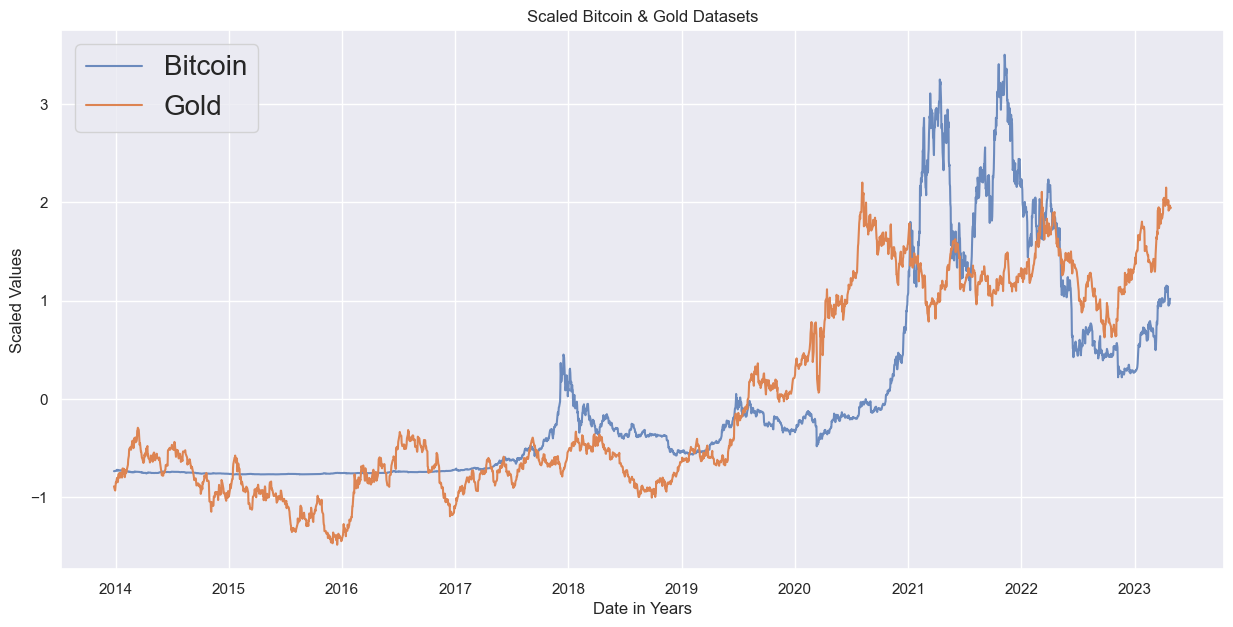

In [34]:
plt.figure(figsize=(15,7))
plt.plot(scaled_df['Date'], scaled_df['Close'], label='Bitcoin', alpha=.8)
plt.plot(scaled_gold['Date'], scaled_gold['Gold_Price'], label='Gold')
plt.title("Scaled Bitcoin & Gold Datasets")
plt.ylabel("Scaled Values")
plt.xlabel("Date in Years")
plt.legend(loc="upper left", fontsize=20)

## Observation:
Bitcoin and Gold hardly show any relation until 2018.
The two line plots have noticeable similarities after 2019. Gold and Bitcoin seemed to increase and decrease around the same time
## Interpretation:
Gold and Bitcoin are related to each other. Both follow very similar trends after 2018-19. The value of Gold could be a great predictor for Bitcoin’s price.

## Sentimental Analysis

In [35]:
SENTdf

,Unnamed: 0,Date,count,Sentiment_Score
0,331,2021-01-02,1,0.0000
1,330,2021-01-04,1,0.5270
2,329,2021-01-08,1,0.3820
3,328,2021-06-18,1,-0.2500
4,327,2021-07-27,1,0.0000
...,...,...,...,...
327,4,2022-08-28,13,-0.0475
328,3,2022-08-29,36,0.1060
329,2,2022-08-30,27,0.1208
330,1,2022-08-31,23,0.0317


(-1.0, 1.0)

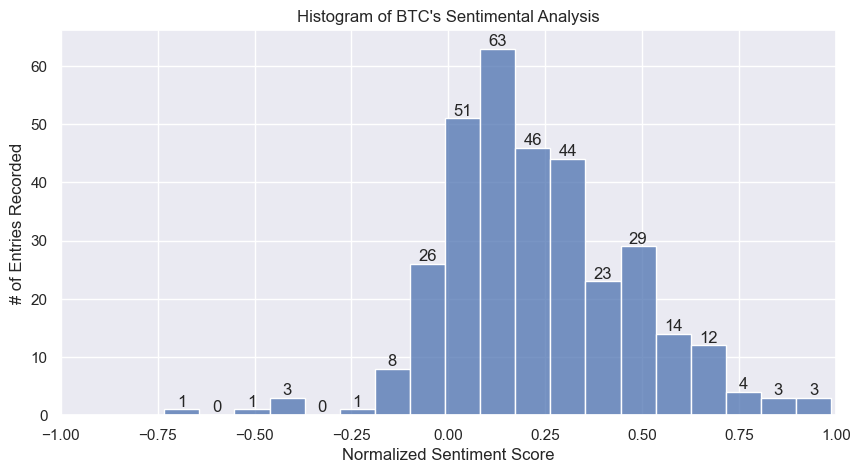

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
p = sns.histplot(data=SENTdf, x='Sentiment_Score')
for i in p.containers:
    p.bar_label(i)
    
p.set_title("Histogram of BTC's Sentimental Analysis")
p.set_xlabel("Normalized Sentiment Score")
p.set_ylabel("# of Entries Recorded")
p.set_xlim(-1, 1)

## Sentimental Score vs Closing Price BTC

In [37]:
sent_scale = scale(SENTdf['Sentiment_Score'])
sent_scale_df = SENTdf.copy()
sent_scale_df['Sentiment_Score'] = sent_scale

start_date = "2021-10-1"
end_date = "2022-09-1"

sent_scale_df = sent_scale_df[(sent_scale_df["Date"] > start_date)]
sent_scale_df = sent_scale_df[(sent_scale_df["Date"] < end_date)]

scaled_df = scaled_df[(scaled_df["Date"] > start_date)]
scaled_df = scaled_df[(scaled_df["Date"] < end_date)]

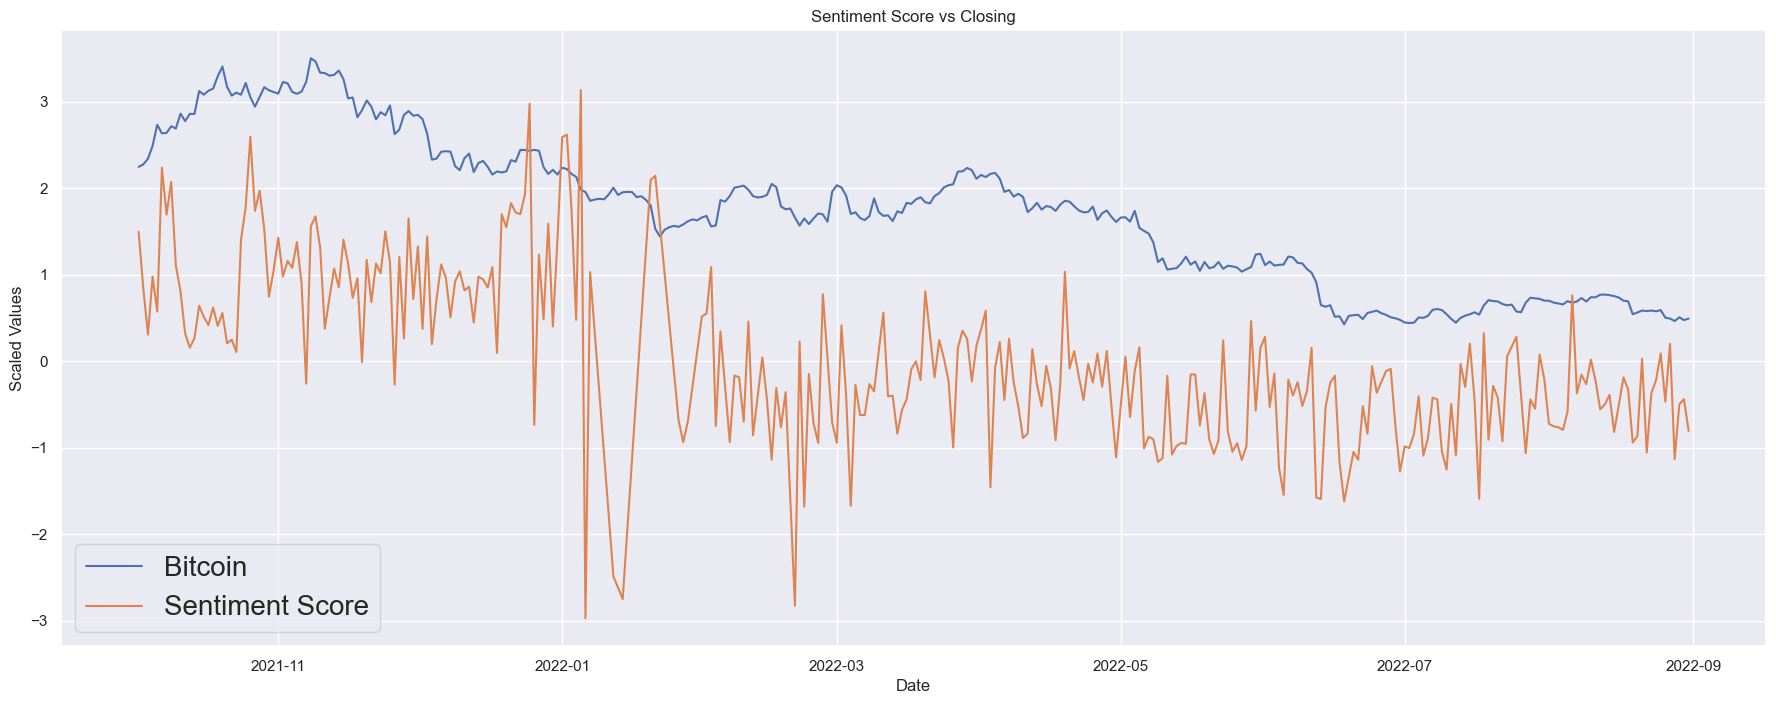

In [38]:
plt.figure(figsize=(22,8))
sns.lineplot(data=scaled_df, x='Date', y='Close', label="Bitcoin")
sns.lineplot(data=sent_scale_df, x='Date', y='Sentiment_Score', label="Sentiment Score")
plt.title("Sentiment Score vs Closing")
plt.ylabel("Scaled Values")
plt.legend(loc="lower left", fontsize=20)
plt.show()

## Observation:
Hard to see much information, however, an observation that can be made is that Bitcoin’s value seems to stay around the same price when sentiment score is above 1. However, bitcoin drops steadily as sentiment scores falls under 0.
## Interpretation:
The sentimental analysis a good predictor. High sentiment score can means bitcoin can rise or most likely to be stable. As sentiment score drops, bitcoin is less stable and will mostly like drop.

## Creating Future Date Dataset: Dates for 5 years into the future
Each element in array is a date converted to nanoseconds

In [39]:
# Creating Future Date Dataset: Dates for 5 years into the future
# Each element in array is a date converted to nanoseconds
import time 
import datetime
future_dates = []
current_Date = datetime.datetime.today() 
years = 5
for i in range(years * 365):
    nextDay_Date = current_Date + datetime.timedelta(days=1)
    current_Date = nextDay_Date
    future_dates.append(nextDay_Date.timestamp() * 10**9)

### Split data and Train the Linear Regression Model

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import PolynomialFeatures, scale
import seaborn as sns
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split


# Separate the Data
target_col = df['Close']
input_col = df['Date']

# Create Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(input_col,
                                                    target_col, test_size=0.33, random_state=1)

## Resize Datasets to be able to train the model
poly = PolynomialFeatures(degree = 1, include_bias = False)
        
x_train_arr = poly.fit_transform(np.array(X_train).reshape(-1,1))

x_test_arr = poly.fit_transform(np.array(X_test).reshape(-1,1))
    
y_train = poly.fit_transform(np.array(y_train).reshape(-1,1))

# Create and Train the model
model = linear_model.LinearRegression()
model.fit(x_train_arr, y_train)
print(f"Training Dataset Accuracy: {model.score(x_train_arr, y_train) * 100:.2f} %")
print(f"Testing Dataset Accuracy: {model.score(x_test_arr, y_test) * 100:.2f} %")

Training Dataset Accuracy: 55.03 %
Testing Dataset Accuracy: 56.00 %


In [41]:
# Reshaping Future Data array
future_dates_arr = np.array(future_dates).reshape(-1,1)
# Using model to predict future dates
future_prediction = model.predict(future_dates_arr)
# Convert result array to be 1 dimensional
results = np.array(future_prediction).reshape(-1)

## Convert Future Dates from Nanoseconds to datetime format
### Create Dataframe with Future Dates and Predicted Results

In [42]:
# Convert Future Dates from Nanoseconds to datetime format
# Create Dataframe with Future Dates and Predicted Results
date_format = []
for i in future_dates:
    reduce = i / 1e9
    date = datetime.datetime.fromtimestamp(reduce)
    date_format.append(date.strftime('%m-%d-%Y')) # %m for month number, %b for Month Name
    
bitcoin_future = pd.DataFrame(data=date_format, columns=["Date"])
bitcoin_future["Price"] = results
bitcoin_future["Date"] = pd.to_datetime(bitcoin_future.Date)

In [43]:
bitcoin_future

,Date,Price
0,2023-05-20,32810.316064
1,2023-05-21,32822.199775
2,2023-05-22,32834.083486
3,2023-05-23,32845.967197
4,2023-05-24,32857.850907
...,...,...
1820,2028-05-13,54438.669815
1821,2028-05-14,54450.553526
1822,2028-05-15,54462.437237
1823,2028-05-16,54474.320948


## Plot Bitcoin Prediction Results

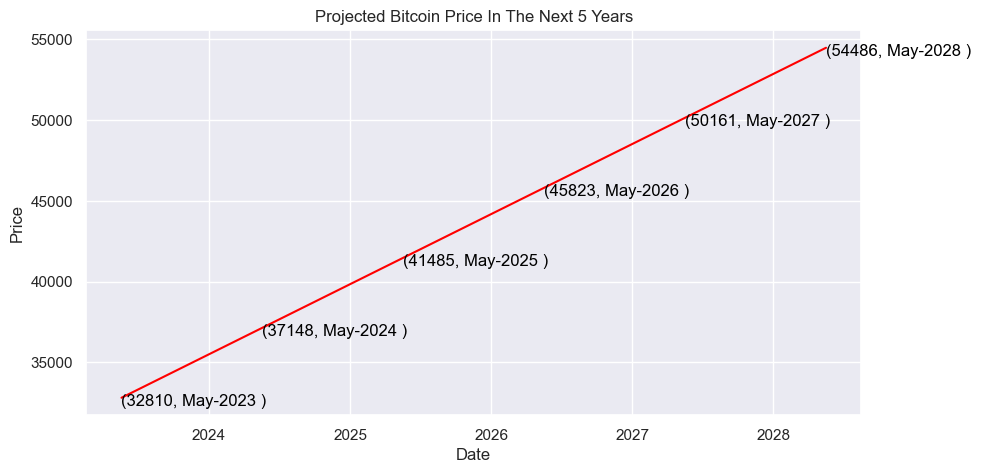

In [44]:
sns.set(rc={'figure.figsize':(10,5)})
# Plot Lineplot
p = sns.lineplot(x='Date', y='Price', data=bitcoin_future, color='red')
p.set(title='Projected Bitcoin Price In The Next 5 Years')

# Selects which datapoints to mark on the graph
dates = list(bitcoin_future['Date'])[::365] + [list(bitcoin_future['Date'])[-1]]
prices = list(bitcoin_future['Price'])[::365] + [list(bitcoin_future['Price'])[-1]]


# Add label points on the plot
for x, y in zip(dates, prices):
    plt.text(x = x, # x-coordinate position of data label
             y = y - 500, # y-coordinate position of data label
             s = '({0:.0f}, {1} )'.format(y, datetime.datetime.fromtimestamp(x.timestamp()).strftime('%b-%Y')),
             color = 'black')

### The projected price of Bitcoin for the next 5 years using the model with a 55% accuracy: 
Although it had a 55% accuracy, These values do seem fairly realistic of what could happen

May 19, 2023 Real Price: \\$26,916

Model's Predicted Price: $32,810, about a \\$6000 difference, an average increase of \\$4000 each year

# Disclaimer:
## This is not investment advice. The information provided is for general information purposes only. Seek independent professional consultation in the form of legal, financial, and fiscal advice before making any investment decision.

## Step 7: FB Prophet Model

In [45]:
#%pip install prophet

In [46]:
# Import libraries
import pandas as pd
from prophet import Prophet

In [47]:
#df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-12-27,763.28,777.51,713.60,735.07,5.957482e+07,5.107930e+10
1,2013-12-28,737.98,747.06,705.35,727.83,3.716228e+07,9.052405e+09
2,2013-12-29,728.05,748.61,714.44,745.05,2.522472e+07,8.855014e+09
3,2013-12-30,741.35,766.60,740.24,756.13,2.276158e+07,9.208370e+09
4,2013-12-31,760.32,760.58,738.17,754.01,2.036396e+07,9.160241e+09


In [48]:
df = df[['Date', 'Close']]
df = df.rename(columns={'Date':'ds', 'Close':'y'})
df

,ds,y
0,2013-12-27,735.07
1,2013-12-28,727.83
2,2013-12-29,745.05
3,2013-12-30,756.13
4,2013-12-31,754.01
...,...,...
3403,2023-04-22,27820.65
3404,2023-04-23,27588.57
3405,2023-04-24,27529.20
3406,2023-04-25,28326.83


In [49]:
# Get the last 20 rows of Data to Test our model with.
#last= df[len(df)-20:]
#last

In [50]:
# Get all of the Data except the last 20 rows to Train our model with.
#df= df[:-20]
#df

In [51]:
# Fit the Model with a Prophet object
m = Prophet(daily_seasonality=False)
# Fit/Train the model
m.fit(df)

C:\Users\jesus\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [52]:
# Dataframe for future timeline
future = m.make_future_dataframe(periods=30)
#future.tail()

In [53]:
# Make predictions for future dataframe (yhat = predicted values)
forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

C:\Users\jesus\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jesus\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


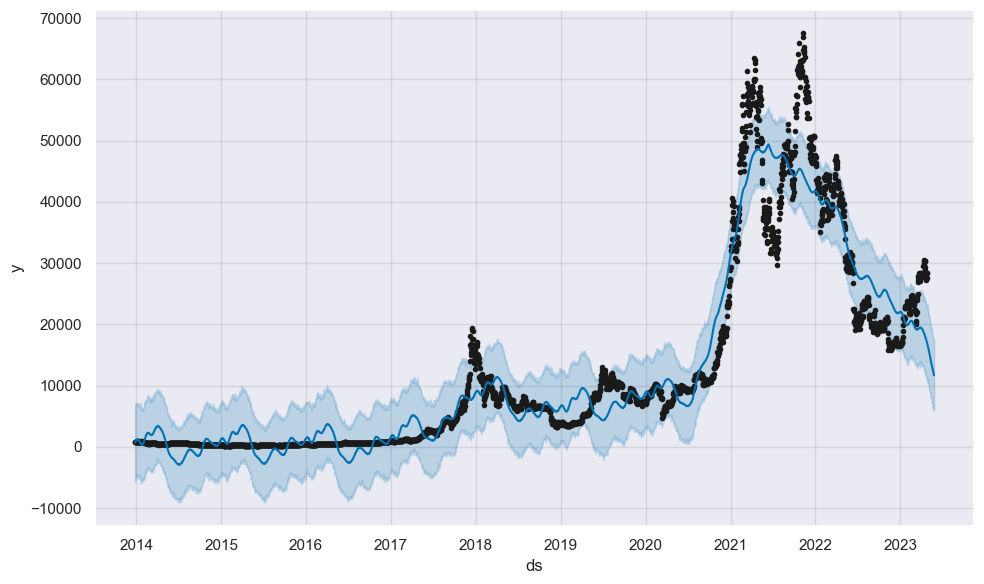

In [54]:
# Plot the forecast
fig1 = m.plot(forecast)